In [1]:
from CommentsSchema import *

In [2]:
import pyspark

In [3]:
data_file = '/Users/sravyakatamneni/Spark/CommentsData/RC_2010-12.bz2'

In [4]:
raw_data = sc.textFile(data_file)

In [5]:
schema = Schema.get()

In [6]:
print(schema)

StructType(List(StructField(archived,BooleanType,true),StructField(author,StringType,true),StructField(author_flair_css_class,StringType,true),StructField(body,StringType,true),StructField(controversiality,LongType,true),StructField(created_utc,StringType,true),StructField(distinguished,StringType,true),StructField(downs,LongType,true),StructField(edited,StringType,true),StructField(gilded,LongType,true),StructField(id,StringType,true),StructField(link_id,StringType,true),StructField(name,StringType,true),StructField(parent_id,StringType,true),StructField(retrieved_on,LongType,true),StructField(score,LongType,true),StructField(score_hidden,BooleanType,true),StructField(subreddit,StringType,true),StructField(subreddit_id,StringType,true),StructField(ups,LongType,true)))


In [7]:
df = sqlContext.read.json(raw_data, schema)

In [8]:
df_data = df.select(Schema.Author, Schema.Ups, Schema.Subreddit, Schema.Body)

In [9]:
df_data.registerTempTable('data_few_cols')

In [10]:
from QueryGenerator import *

In [11]:
cars_query = 'select ' + QueryGenerator.columns() + ' from data_few_cols ' + QueryGenerator.cars()

In [12]:
print(cars_query)

select author, subreddit, ups, body from data_few_cols  where subreddit in ('cars', 'WhatCarShouldIBuy', 'UsedCars', 'AskCarSales', 'CarReviews') 


In [13]:
phones_query = 'select ' + QueryGenerator.columns() + ' from data_few_cols ' + QueryGenerator.phones()

In [14]:
print(phones_query)

select author, subreddit, ups, body from data_few_cols  where subreddit in ('phones', 'Smartphones', 'suggestasmartphone', 'PickMeAPhone', 'apple', 'iphone', 'PickAnAndroidForMe', 'androidphones') 


In [15]:
cars_data = sqlContext.sql(cars_query)

In [16]:
cars_df = cars_data.toPandas()

In [17]:
cars_df.shape

(2551, 4)

In [18]:
phones_data = sqlContext.sql(phones_query)

In [19]:
phones_df = phones_data.toPandas()

In [20]:
phones_df.shape

(28752, 4)

In [21]:
phones_df.head(4)

,author,subreddit,ups,body
0,mrtherapist,apple,1,Since Apple doesn't have to stick with convent...
1,[deleted],apple,1,[deleted]
2,Davin900,iphone,2,Pixelpipe will send photos and videos to any n...
3,pipsqeek,apple,0,Maybe they're preparing for all the staff at G...


In [23]:
from SentimentScorer import *

In [24]:
phones_df['score'] = phones_df['body'].map(SentimentScorer.score)

In [25]:
phones_df.head(4)

,author,subreddit,ups,body,score
0,mrtherapist,apple,1,Since Apple doesn't have to stick with convent...,0.9645
1,[deleted],apple,1,[deleted],0.0000
2,Davin900,iphone,2,Pixelpipe will send photos and videos to any n...,0.0772
3,pipsqeek,apple,0,Maybe they're preparing for all the staff at G...,0.0000


In [26]:
phones_df_iphonex = phones_df[(phones_df['body'].str.lower().str.contains('apple'))]

In [27]:
phones_df_iphonex.shape

(3343, 5)

In [28]:
phones_df_iphonex['score'].mean()

0.19837086449297053

In [29]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a119b3048>]],
      dtype=object)

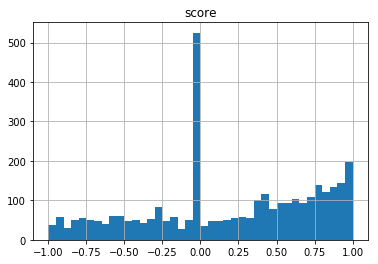

In [30]:
phones_df_iphonex.hist(column='score', bins=40)

In [31]:
phones_df_moto = phones_df[(phones_df['body'].str.lower().str.contains('motorola'))]

In [32]:
phones_df_moto['score'].mean()

0.5677818181818182

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d8e6d30>]],
      dtype=object)

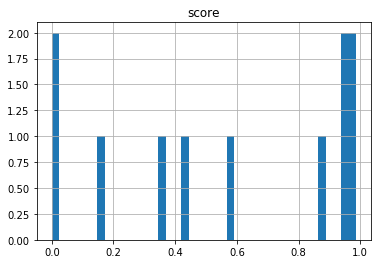

In [33]:
phones_df_moto.hist(column='score', bins=40)

In [34]:
phones_df_count_subr = phones_df.groupby(Schema.Subreddit)[Schema.Body].count().reset_index(name='count').sort_values(['count'], ascending=False)

In [35]:
import BarPlotter

In [36]:
phones_df_count_subr.head(5)

,subreddit,count
1,apple,22209
2,iphone,6542
0,Smartphones,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d3b9da0>]],
      dtype=object)

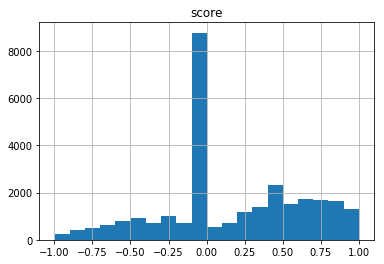

In [37]:
phones_df.hist(column='score', bins=20)

In [38]:
phones_df_moto['score'].mean()

0.5677818181818182

In [39]:
phones_df_samsung = phones_df[(phones_df['body'].str.lower().str.contains('samsung'))]

In [40]:
phones_df_samsung.shape

(41, 5)

In [41]:
phones_df_samsung['score'].mean()

0.12332926829268293

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1db40828>]],
      dtype=object)

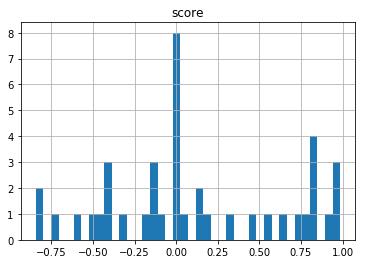

In [42]:
phones_df_samsung.hist(column='score', bins=40)

In [43]:
cars_df['score'] = cars_df['body'].map(SentimentScorer.score)

In [44]:
cars_df.head(5)

,author,subreddit,ups,body,score
0,[deleted],cars,1,why not just put a stool on a 1/5 scale rc car.,0.0000
1,autobahn,cars,0,Incorrect.\n\nAlso please state how you have e...,0.3182
2,autobahn,cars,1,I agree. PPIs are always a good idea with a us...,0.5442
3,autobahn,cars,1,12 year old cars are easy to steal.\n\nWhy ste...,-0.7717
4,amarks563,cars,0,My experience has been that a first-time drive...,-0.6486


In [45]:
cars_df_tesla = cars_df[(cars_df['body'].str.lower().str.contains('tesla'))]

In [46]:
cars_df_tesla.shape

(2, 5)

In [47]:
cars_df_tesla['score'].mean()

-0.7218

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1dceeba8>]],
      dtype=object)

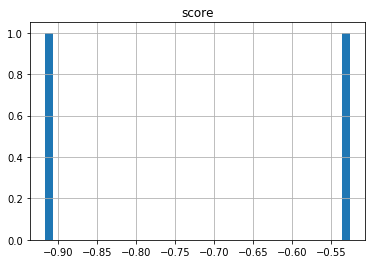

In [48]:
cars_df_tesla.hist(column='score', bins=40)

In [49]:
cars_df_subaru = cars_df[(cars_df['body'].str.lower().str.contains('subaru'))]

In [50]:
cars_df_subaru.shape

(45, 5)

In [51]:
cars_df_subaru['score'].mean()

0.37823777777777773

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1da91278>]],
      dtype=object)

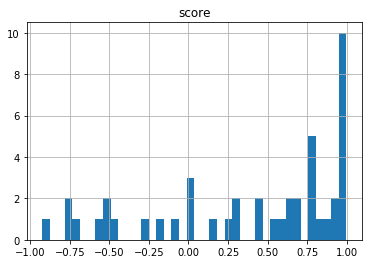

In [52]:
cars_df_subaru.hist(column='score', bins=40)

In [53]:
cars_df_ford = cars_df[(cars_df['body'].str.lower().str.contains('ford'))]

In [54]:
cars_df_ford.shape

(62, 5)

In [55]:
cars_df_ford['score'].mean()

0.46703548387096766

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d5110b8>]],
      dtype=object)

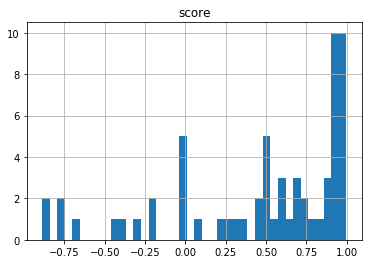

In [56]:
cars_df_ford.hist(column='score', bins=40)

In [57]:
cars_df_audi = cars_df[(cars_df['body'].str.lower().str.contains('audi'))]

In [58]:
cars_df_audi.shape

(61, 5)

In [59]:
cars_df_audi['score'].mean()

0.3911967213114755

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d60af60>]],
      dtype=object)

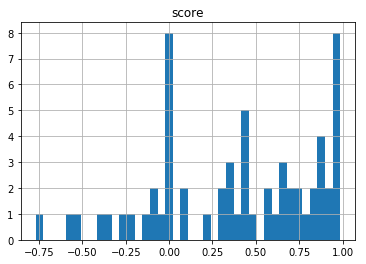

In [60]:
cars_df_audi.hist(column='score', bins=40)